# Librerías

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Procesamiento de los datos

## Lectura de datos

In [89]:
data_train = pd.read_csv('mnist_train_small.csv',header=None)
data_test = pd.read_csv('mnist_test.csv',header=None)

## Separación de los datos en entrenamiento y prueba

In [90]:
x_train = data_train.drop(columns=0)
y_train = data_train[0]

x_test = data_test.drop(columns=0)
y_test = data_test[0]

In [91]:
# Leer data de Fashion MNIST

# from tensorflow.keras.datasets import fashion_mnist

# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# x_train = x_train.reshape(-1, 784)
# x_test = x_test.reshape(-1, 784)

## Estandarización de los datos

Estandarizamos los valores de la x a un rango de 0 a 1

In [92]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Modelo de red neuronal

* Creamos el modelo de red neuronal.

* La capa de entrada es una que tiene 784 neuronas. Una por cada pixel de la
imagen de 28*28.

* La segunda y tercera capa (capas ocultas) tienen 16 neuronas cada una y la
función de activación sera la sigmoide.

* Finalmente la capa de salida es una de 10 neuronas, una por cada dígito.

In [93]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784)),               # Primera capa que tiene 784 inputs, neuronas
    tf.keras.layers.Dense(16, activation='sigmoid'),  # Segunda capa, capa totalmente conectada con 16 neuronas
    tf.keras.layers.Dense(16, activation='sigmoid'),  # Tercera capa, capa totalmente conectada con 16 neuronas
    tf.keras.layers.Dense(10)                         # Capa de salida con 10 neuronas (para los digitos del 0 al 9)
])

No hay una regla que nos indique cuántas capas utilizar, es prueba y error.

Al compilar el modelo, debemos especificar el optimizador (cómo es que de manera
iterativa se buscarán los coeficientes y bias), la función de costo (como es
clasificación se emplea el CrossEntropy) y las métricas para que nosotros
podamos interpretar si la red es buena o no.

In [94]:
modelo.compile(optimizer='sgd',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

El resumen nos indicará la cantidad de parámetros que se entrenarán y la arquitectura de la red que hemos creado.

In [95]:
modelo.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                12560     
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dense_29 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


Definimos un número de iteraciones, y entrenamos el modelo guardando el historico de los valores del entrenamiento y validación para determinar si está haciendo overfitting, o no, entre otras cosas más.

In [96]:
epoch = 50
historial = modelo.fit(x_train, y_train,
                       validation_data=(x_test, y_test),
                       epochs=epoch)

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1670 - accuracy: 0.3177 - val_loss: 1.9829 - val_accuracy: 0.3733
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7712 - accuracy: 0.4633 - val_loss: 1.5843 - val_accuracy: 0.5498
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4318 - accuracy: 0.5849 - val_loss: 1.3047 - val_accuracy: 0.5973
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1988 - accuracy: 0.6065 - val_loss: 1.1196 - val_accuracy: 0.6123
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0473 - accuracy: 0.6268 - val_loss: 1.0009 - val_accuracy: 0.6299
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9489 - accuracy: 0.6459 - val_loss: 0.9211 - val_accuracy: 0.6501
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8794 - accuracy: 0.6650 - val_loss: 0.8626 - val_accuracy:

Graficamos tanto el valor del accuracy como de la función de pérdida. Train y Test

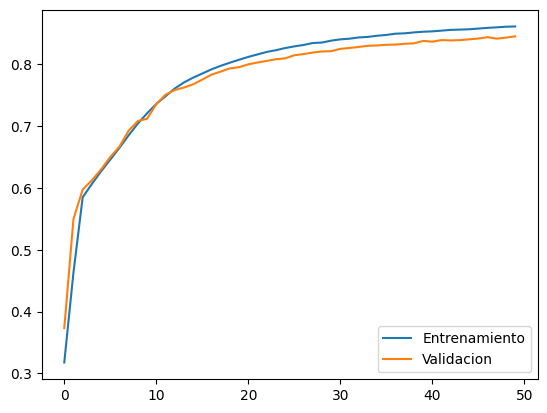

In [97]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']
loss = historial.history['loss']
val_loss = historial.history['val_loss']

plt.plot(range(epoch), acc, label='Entrenamiento')
plt.plot(range(epoch), val_acc, label='Validacion')
plt.legend(loc='lower right')

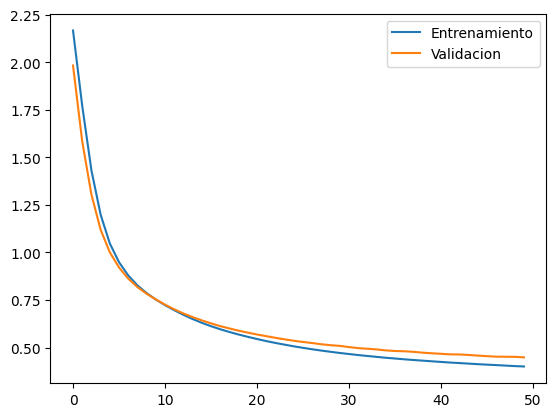

In [98]:
plt.plot(range(epoch), loss, label='Entrenamiento')
plt.plot(range(epoch), val_loss, label='Validacion')
plt.legend(loc='upper right')

Con el método predict realizamos predicciones (feed-forward) y guardamos el
resultado en una lista.
Como el resultado de esta predicción son los 10 valores de las neuronas, debemos
capturar el máximo valor para identificar el dígito que la red cree que es.

Adicionalmente, si queremos interpretar el resultado de las 10 neuronas como qué
tan seguro está la red de que es un dígito determinado (la probabilidad),
podemos agregar la capa Softmax.

In [99]:
y_pred = modelo.predict(x_test)

modelo_probabilidad = tf.keras.Sequential([modelo, tf.keras.layers.Softmax()])

y_pred_proba = modelo_probabilidad.predict(x_test)

313/313 [==============================] - 0s 495us/step


Se muestra ejemplos de predicciones

In [100]:
item = 2

print(list(map('{:.3f}'.format, y_pred[item])))
print(list(map('{:.3f}'.format, y_pred_proba[item])))

print("Valor real: {}".format(y_test[item]))

['1.563', '8.201', '0.152', '1.817', '1.223', '-3.348', '-1.362', '2.517', '-7.295', '-3.159']
['0.001', '0.992', '0.000', '0.002', '0.001', '0.000', '0.000', '0.003', '0.000', '0.000']
Valor real: 1


Se muestra ejemplos gráficos de la imagen a predecir

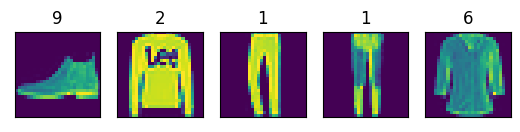

In [108]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

# plot_example(x_test.values, y_test)
plot_example(x_test, y_test)

# Análisis de resultados con matriz de confusión

Mostramos la matriz de confusión

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

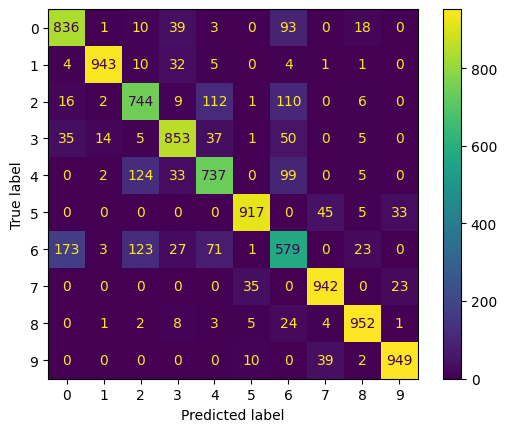

In [110]:
cf = confusion_matrix(y_test, list(map(np.argmax, y_pred)))
ConfusionMatrixDisplay(cf).plot()

A fin de comparar las capacidades de nuestra red neuronal contra una regresión
logística, realizamos el entrenamiento de la regresión y obtenemos los puntajes.

In [114]:
from sklearn.linear_model import LogisticRegression

modeloLin = LogisticRegression(max_iter=1000)
modeloLin.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

0.8810833333333333
0.8441


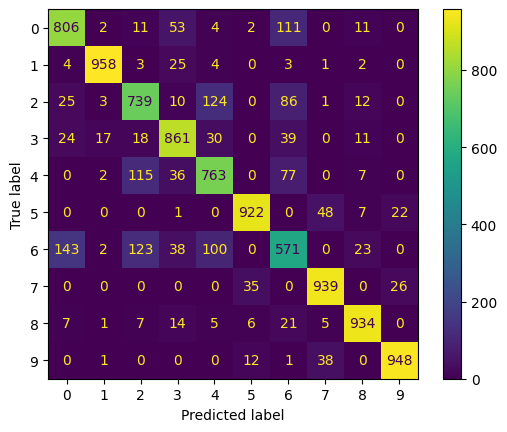

In [115]:
print(modeloLin.score(x_train, y_train))
print(modeloLin.score(x_test, y_test))

y_pred_lin = modeloLin.predict(x_test)

cf2 = confusion_matrix(y_test, y_pred_lin)
ConfusionMatrixDisplay(cf2).plot()

Como ejercicio adicional, cambiamos la data que empleamos al fashion-mnist y
observamos qué algoritmo de ML es mejor en ese caso.